In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

### Load training data

In [2]:
data = pd.read_csv('train.csv', sep=';')

In [3]:
data.sample(10)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
957510,34/8-7 R,4678.760000,476279.93750,6798614.0,-4650.824707,BAAT GP.,Ness Fm.,19.120703,9.232271,13.151958,...,NaN,NaN,NaN,-0.030031,NaN,NaN,NaN,NaN,30000,1.0
151835,16/4-1,2204.737604,449956.43750,6500266.5,-2179.177734,ROGALAND GP.,Heimdal Fm.,12.102000,0.340050,0.340767,...,3.357165,NaN,-0.148000,-0.036417,0.149783,NaN,NaN,0.489633,30000,1.0
193941,17/11-1,499.577016,520153.18750,6452287.5,-472.577026,NORDLAND GP.,NaN,13.450793,0.984644,1.745430,...,171.428604,NaN,NaN,0.038372,1.090420,NaN,NaN,NaN,65000,1.0
953657,34/8-3,3048.424434,475755.75000,6808503.0,-3020.519775,DUNLIN GP.,Cook Fm.,9.748233,2.815506,2.802172,...,NaN,NaN,NaN,-0.014549,NaN,2.698672,NaN,2.699701,65030,1.0
832955,34/11-2 S,3798.416000,467002.28125,6788171.5,-3731.916992,VIKING GP.,Draupne Fm.,8.670938,NaN,13.338161,...,NaN,NaN,NaN,-0.008000,NaN,NaN,11.890960,-999.000000,30000,1.0
1125647,35/9-2,2129.576358,550241.00000,6800627.0,-2097.352783,VIKING GP.,Sognefjord Fm.,8.346808,18.232542,615.140137,...,NaN,161.265976,-0.153191,-0.001694,NaN,17.745361,NaN,20.196136,30000,1.0
322506,25/4-5,2851.342805,454469.53125,6603730.0,-2826.042725,SHETLAND GP.,Jorsalfare Fm.,13.526553,NaN,2.468339,...,NaN,NaN,1.276552,0.000000,NaN,NaN,NaN,NaN,80000,1.0
134450,16/2-6,925.490799,477771.03125,6520634.0,-899.440735,NORDLAND GP.,Utsira Fm.,12.473072,NaN,1.271515,...,31.716082,NaN,NaN,-0.016143,NaN,NaN,31.941462,NaN,65030,2.0
67898,16/10-1,1838.423790,444152.96875,6435554.5,-1813.342285,HORDALAND GP.,Utsira Fm.,12.824336,NaN,0.829574,...,12.646891,NaN,0.324336,-0.002829,0.158171,NaN,NaN,NaN,65000,1.0
727949,33/9-1,2514.778000,437780.34375,6791573.5,-2489.778076,BAAT GP.,Ness Fm.,12.333724,2.160253,3.812947,...,NaN,NaN,NaN,-0.018961,NaN,NaN,NaN,NaN,65000,1.0


In [4]:
data.shape

(1170511, 29)

### Outliers

In [5]:
data_copy = data.copy()

In [6]:
lithology_numbers = {30000: 0,
                 65030: 1,
                 65000: 2,
                 80000: 3,
                 74000: 4,
                 70000: 5,
                 70032: 6,
                 88000: 7,
                 86000: 8,
                 99000: 9,
                 90000: 10,
                 93000: 11}
labels_name = 'FORCE_2020_LITHOFACIES_LITHOLOGY'
lit_to_numbers = data_copy[labels_name].map(lithology_numbers)
data_copy[labels_name] = lit_to_numbers
data_copy[labels_name].sample(10)

463136     2
348304     0
1021794    1
666727     2
917535     2
745207     2
226566     1
846470     0
845362     2
566724     2
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

#### Labels distribution

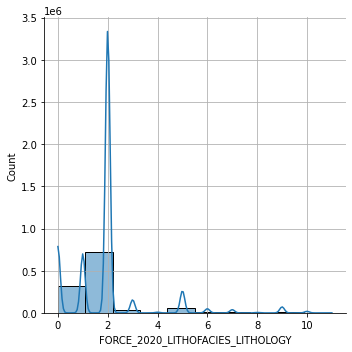

In [7]:
sns.displot(data_copy[labels_name], bins=10, kde=True)
plt.grid()
pass

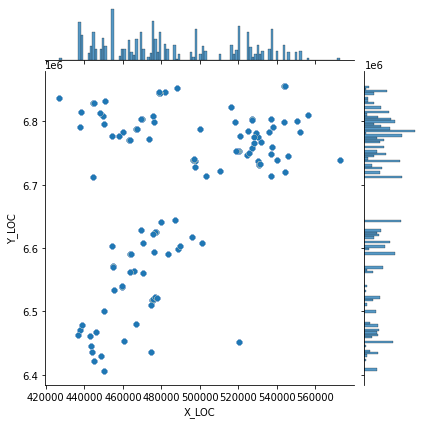

In [8]:
sns.jointplot(x='X_LOC', y='Y_LOC', alpha=.05, data=data_copy)
pass

0.005    436797.771094
0.010    436809.250000
0.050    438424.968750
0.100    444158.281250
0.500    476920.312500
0.900    536841.562500
0.950    543917.125000
0.990    551801.290625
0.995    556075.812500
Name: X_LOC, dtype: float64

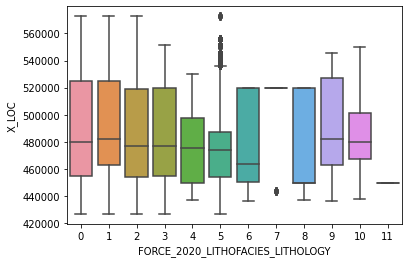

In [9]:
sns.boxplot(x=labels_name, y="X_LOC", data=data_copy)
data_copy['X_LOC'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    6406642.0
0.010    6406647.0
0.050    6452287.5
0.100    6468386.0
0.500    6737311.0
0.900    6812832.0
0.950    6829540.5
0.990    6847170.5
0.995    6853000.0
Name: Y_LOC, dtype: float64

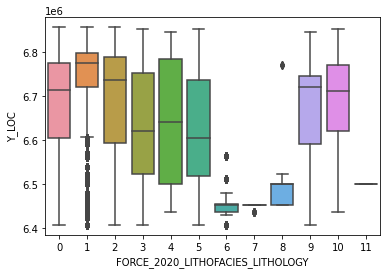

In [10]:
sns.boxplot(x=labels_name, y="Y_LOC", data=data_copy)
data_copy['Y_LOC'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005   -4744.577674
0.010   -4556.764673
0.050   -3872.754150
0.100   -3461.883423
0.500   -2042.784973
0.900    -922.527039
0.950    -697.141251
0.990    -422.672520
0.995    -330.519095
Name: Z_LOC, dtype: float64

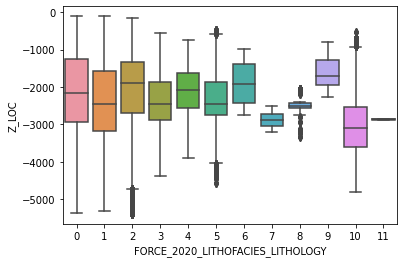

In [11]:
sns.boxplot(x=labels_name, y="Z_LOC", data=data_copy)
data_copy['Z_LOC'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

### Drop outliers

In [12]:
rows_to_drop = data_copy[
    (data_copy['Z_LOC'] < data_copy['Z_LOC'].quantile(0.005)) | (data_copy['Z_LOC'] > data_copy['Z_LOC'].quantile(0.995)) | 
    (data_copy['X_LOC']  < data_copy['X_LOC' ].quantile(0.005)) | (data_copy['X_LOC']  > data_copy['X_LOC' ].quantile(0.995)) |
    (data_copy['Y_LOC']  < data_copy['Y_LOC' ].quantile(0.005)) | (data_copy['Y_LOC']  > data_copy['Y_LOC' ].quantile(0.995))].index
data = data.drop(rows_to_drop)

### Corr matrix

In [13]:
corr_mat = data_copy.corr()
corr_mat = corr_mat[corr_mat < 1.0]

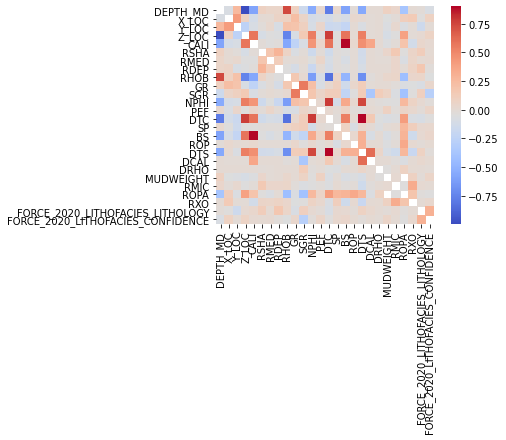

In [14]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm', xticklabels=True, yticklabels=True)
pass

### Inspecting available logs and interpretations

The data contains the metadata columns
* WELL: well name
* DEPTH_MD: measured depth
* X_LOC: UTM X coordinate 
* Y_LOC: UTM Y coordinate
* Z_LOC: DEPTH
* GROUP: NPD lithostratigraphy group
* FORMATION: NPD lithostratgraphy formation

The data contains the well log curves. For example the following:
* BS: Bit Size
* CALI: Caliper
* RDEP: Deep Resistivity
* RHOB: Bulk Density
* GR: Raw gamma data
* SGR: Spectral Gamma Ray
* RMED: Medium Resistivity
* ROP: Rate of Penetration
* NPHI: Neutron Porosity
* PEF: Photoelectric Absorption Factor
* RSHA: Shallow Resistivity
* DTS: Sonic (Sheer Slowness)
* DTC: Sonic (Compressional Slowness)

See contest page for full list.

as well as the interpretation

* FORCE_2020_LITHOFACIES_LITHOLOGY: lithology class label
* FORCE_2020_LITHOFACIES_CONFIDENCE: confidence in lithology interpretation (1: high, 2: medium, 3: low)

There is a total of 83 wells in the training dataset. The `WELL` column is included so the data can be separated per well. This will be necessary for any "windowed" approaches where we use non-local information in the ML features. 

In [15]:
wells = data['WELL'].unique()

In [16]:
wells

array(['15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6 A', '16/10-1',
       '16/10-2', '16/10-3', '16/10-5', '16/11-1 ST3', '16/2-11 A',
       '16/2-16', '16/2-6', '16/4-1', '16/5-3', '16/7-4', '16/7-5',
       '16/8-1', '17/11-1', '25/11-15', '25/11-19 S', '25/11-5',
       '25/2-13 T4', '25/2-14', '25/2-7', '25/3-1', '25/4-5', '25/5-1',
       '25/5-4', '25/6-1', '25/6-2', '25/6-3', '25/7-2', '25/8-5 S',
       '25/8-7', '25/9-1', '26/4-1', '29/6-1', '30/3-3', '30/3-5 S',
       '30/6-5', '31/2-1', '31/2-19 S', '31/2-7', '31/2-8', '31/2-9',
       '31/3-1', '31/3-2', '31/3-3', '31/3-4', '31/4-10', '31/4-5',
       '31/5-4 S', '31/6-5', '31/6-8', '32/2-1', '33/6-3 S', '33/9-1',
       '33/9-17', '34/10-19', '34/10-21', '34/10-33', '34/10-35',
       '34/11-1', '34/11-2 S', '34/12-1', '34/2-4', '34/3-1 A',
       '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/7-13', '34/7-20',
       '34/7-21', '34/8-1', '34/8-3', '34/8-7 R', '35/11-1', '35/11-10',
       '35/11-11', '35/11-12', '35/11-

In [17]:
len(wells)

96

### The LITHOLOGY column

The LITHOLOGY column contains the interpretation. Each number corresponds to a lithology class, given by the following list:

In [18]:
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

In [19]:
data['FORCE_2020_LITHOFACIES_LITHOLOGY'].unique()

array([65000, 30000, 65030, 70000, 99000, 80000, 86000, 74000, 70032,
       90000, 88000, 93000])

Lithologies are not equally likely. This is reflected in this dataset.

<ipython-input-20-0dac7bdbb0db>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names, rotation=45)


Text(0, 0.5, 'Lithology presence (\\%)')

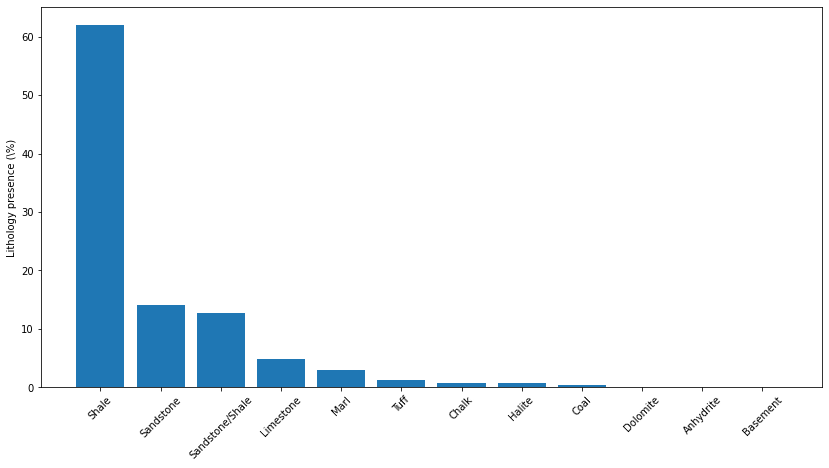

In [20]:
counts = data['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()
names = []
percentage = []
N = data['FORCE_2020_LITHOFACIES_LITHOLOGY'].shape[0]
for item in counts.iteritems():
    names.append(lithology_keys[item[0]])
    percentage.append(float(item[1])/N*100)
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(x=np.arange(len(names)), height=percentage)
ax.set_xticklabels(names, rotation=45)
ax.set_xticks(np.arange(len(names)))
ax.set_ylabel('Lithology presence (\%)')

### Missing logs

**Notice that some of the curves are NaN. This is an imporant aspect of this dataset and of this competition.** The only log columns that are **guaranteed** to be present are WELL, DEPT, and GR. All other logs can (and will) be missing from some parts of the dataset.

In [21]:
data.isna().any()

WELL                                 False
DEPTH_MD                             False
X_LOC                                 True
Y_LOC                                 True
Z_LOC                                 True
GROUP                                 True
FORMATION                             True
CALI                                  True
RSHA                                  True
RMED                                  True
RDEP                                  True
RHOB                                  True
GR                                   False
SGR                                   True
NPHI                                  True
PEF                                   True
DTC                                   True
SP                                    True
BS                                    True
ROP                                   True
DTS                                   True
DCAL                                  True
DRHO                                  True
MUDWEIGHT  

In [22]:
data.isna().sum()

WELL                                       0
DEPTH_MD                                   0
X_LOC                                  10775
Y_LOC                                  10775
Z_LOC                                  10775
GROUP                                   1232
FORMATION                             131195
CALI                                   83668
RSHA                                  525914
RMED                                   38876
RDEP                                   11015
RHOB                                  156970
GR                                         0
SGR                                  1067602
NPHI                                  399177
PEF                                   480898
DTC                                    77182
SP                                    292229
BS                                    481667
ROP                                   622363
DTS                                   969330
DCAL                                  844808
DRHO      

### Procent of Nan's at the dataset

In [23]:
count_nan = 0
for i in data.isna().sum():
    count_nan += i
print(f"Total procent of Nan's at the dataset {count_nan/(data.shape[0]*data.shape[1])*100:.5f}")

Total procent of Nan's at the dataset 30.20742


The following plot shows how large a percentage of training data wells contain at least some depth interval with the given logs. As you can see a couple of logs like RT and DTS are present in less than half of the training wells. **Remember, the test data will have a similar distribution of available logs**

<ipython-input-24-3e496e06d9ed>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.columns[2:-2], rotation=45)


Text(0, 0.5, 'Well presence (\\%)')

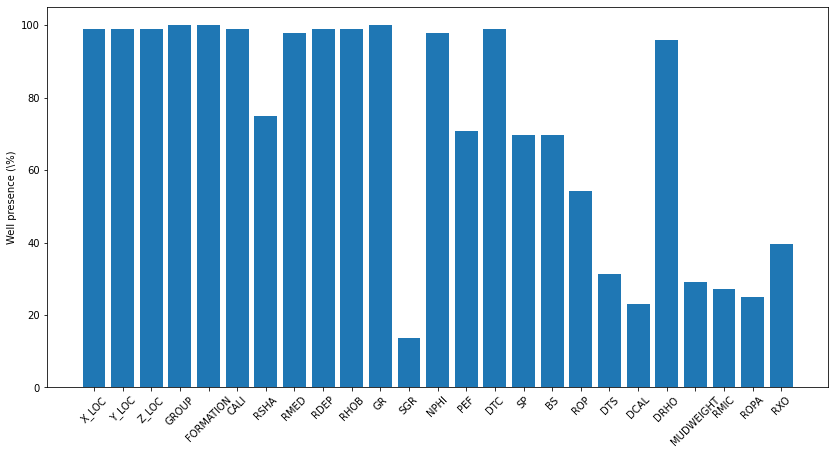

In [24]:
occurences = np.zeros(25)
for well in data['WELL'].unique():
    occurences += data[data['WELL'] == well].isna().all().astype(int).values[2:-2]
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(x=np.arange(occurences.shape[0]), height=(data.WELL.unique().shape[0]-occurences)/data.WELL.unique().shape[0]*100.0)
ax.set_xticklabels(data.columns[2:-2], rotation=45)
ax.set_xticks(np.arange(occurences.shape[0]))
ax.set_ylabel('Well presence (\%)')

#### Look at some log curves for a couple of wells

(3272.0240000000003, 494.528)

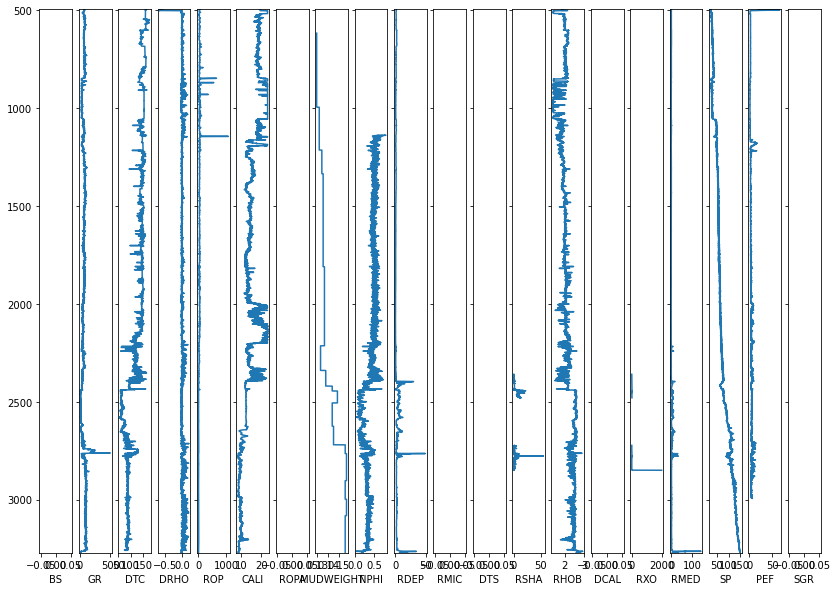

In [25]:
well_data = data[data['WELL'] == wells[0]]
fig, axs = plt.subplots(1, len(well_data.columns)-9, figsize=(14, 10), sharey=True)
for ic, col in enumerate(set(well_data.columns)-set(['DEPTH_MD', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
                                                     'FORCE_2020_LITHOFACIES_CONFIDENCE', 'WELL', 'GROUP', 'FORMATION',
                                                    'X_LOC', 'Y_LOC', 'Z_LOC'])):
    axs[ic].plot(well_data[col], well_data['DEPTH_MD'])
    axs[ic].set_xlabel(col)
axs[0].set_ylim(well_data['DEPTH_MD'].values[-1], well_data['DEPTH_MD'].values[0])

(3118.218, 488.77)

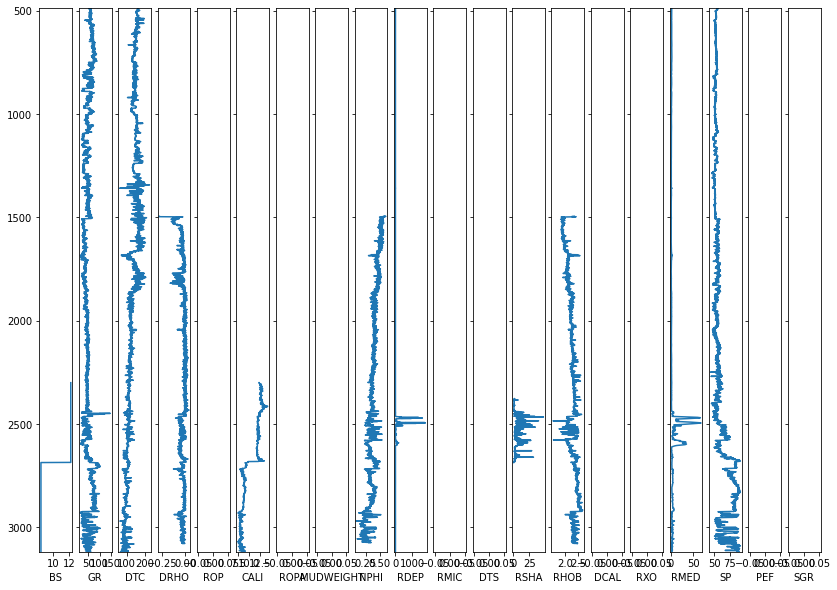

In [26]:
well_data = data[data['WELL'] == wells[57]]
fig, axs = plt.subplots(1, len(well_data.columns)-9, figsize=(14, 10), sharey=True)
for ic, col in enumerate(set(well_data.columns)-set(['DEPTH_MD', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
                                                     'FORCE_2020_LITHOFACIES_CONFIDENCE', 'WELL', 'GROUP', 'FORMATION',
                                                    'X_LOC', 'Y_LOC', 'Z_LOC'])):
    axs[ic].plot(well_data[col], well_data['DEPTH_MD'])
    axs[ic].set_xlabel(col)
axs[0].set_ylim(well_data['DEPTH_MD'].values[-1], well_data['DEPTH_MD'].values[0])

### Preparing data for training

In [27]:
X = data.drop(columns=['WELL', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE'])

##### As a simple approach we replace nan with zero and hope for the best

In [28]:
X.columns

Index(['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION', 'CALI',
       'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF', 'DTC', 'SP',
       'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO'],
      dtype='object')

In [29]:
X.fillna(X.median(axis = 0), axis=0 , inplace=True)

In [30]:
X.isna().sum()

DEPTH_MD          0
X_LOC             0
Y_LOC             0
Z_LOC             0
GROUP          1232
FORMATION    131195
CALI              0
RSHA              0
RMED              0
RDEP              0
RHOB              0
GR                0
SGR               0
NPHI              0
PEF               0
DTC               0
SP                0
BS                0
ROP               0
DTS               0
DCAL              0
DRHO              0
MUDWEIGHT         0
RMIC              0
ROPA              0
RXO               0
dtype: int64

In [31]:
X['GROUP'].fillna(X['GROUP'].mode().iloc[0], inplace=True)
X['FORMATION'].fillna(X['FORMATION'].mode().iloc[0], inplace=True)

In [32]:
X.isna().sum()

DEPTH_MD     0
X_LOC        0
Y_LOC        0
Z_LOC        0
GROUP        0
FORMATION    0
CALI         0
RSHA         0
RMED         0
RDEP         0
RHOB         0
GR           0
SGR          0
NPHI         0
PEF          0
DTC          0
SP           0
BS           0
ROP          0
DTS          0
DCAL         0
DRHO         0
MUDWEIGHT    0
RMIC         0
ROPA         0
RXO          0
dtype: int64

In [33]:
X['GROUP'].unique()

array(['NORDLAND GP.', 'HORDALAND GP.', 'ROGALAND GP.', 'SHETLAND GP.',
       'CROMER KNOLL GP.', 'VIKING GP.', 'VESTLAND GP.', 'ZECHSTEIN GP.',
       'HEGRE GP.', 'ROTLIEGENDES GP.', 'TYNE GP.', 'BOKNFJORD GP.',
       'DUNLIN GP.', 'BAAT GP.'], dtype=object)

In [34]:
X['FORMATION'].unique()

array(['Utsira Fm.', 'Balder Fm.', 'Sele Fm.', 'Lista Fm.', 'Heimdal Fm.',
       'Tor Fm.', 'Hod Fm.', 'Blodoeks Fm.', 'Svarte Fm.', 'Roedby Fm.',
       'Sola Fm.', 'Aasgard Fm.', 'Draupne Fm.', 'Heather Fm.',
       'Hugin Fm.', 'Smith Bank Fm.', 'Frigg Fm.', 'Skagerrak Fm.',
       'Ekofisk Fm.', 'Kupferschiefer Fm.', 'Skade Fm.', 'Grid Fm.',
       'Vaale Fm.', 'Sleipner Fm.', 'Hidra Fm.', 'Tuxen Fm.',
       'Mandal Fm.', 'Ula Fm.', 'Bryne Fm.', 'Tau Fm.', 'Sandnes Fm.',
       'Intra Draupne Fm. Sst.', 'Statfjord Fm.', 'Skade Mb.', 'BASEMENT',
       'Ran Sst Mb.', 'Flekkefjord Fm.', 'Sauda Fm.', 'Egersund Fm.',
       'Intra Balder Fm. Sst.', 'Hermod Mb.', 'Ty Fm.', 'Hardraade Fm.',
       'Kyrre Fm.', 'Tryggvason Fm.', 'Drake Fm.', 'Cook Fm.',
       'Amundsen Fm.', 'Grid Mb.', 'Ty Mb.', 'Jorsalfare Fm.',
       'Burton Fm.', 'Mime Fm.', 'Intra Heather Fm. Sst.', 'Tarbert Fm.',
       'Ness Fm.', 'Etive Fm.', 'Rannoch Fm.', 'Broom Fm.', 'Lunde Fm.',
       'Oseberg Fm.', 'Sogn

In [35]:
X['FORMATION'] = X['FORMATION'].astype('category')

In [36]:
X['GROUP'] = X['GROUP'].astype('category')

In [37]:
cat_columns = X.select_dtypes(['category']).columns

In [38]:
X[cat_columns] = X[cat_columns].apply(lambda x: x.cat.codes)

In [39]:
X.select_dtypes(['category']).columns

Index([], dtype='object')

#### We should convert lithology labels to numbers 0-11 before training

In [40]:
y = data['FORCE_2020_LITHOFACIES_LITHOLOGY']

In [41]:
lithology_numbers = {30000: 0,
                 65030: 1,
                 65000: 2,
                 80000: 3,
                 74000: 4,
                 70000: 5,
                 70032: 6,
                 88000: 7,
                 86000: 8,
                 99000: 9,
                 90000: 10,
                 93000: 11}

In [42]:
y = y.map(lithology_numbers)

##### Lithologies are not equally likely. Probably smart to take this into account by computing class weights

In [43]:
np.bincount(y)

array([160378, 144762, 704677,  33009,   1688,  55538,   8472,   8213,
         1085,  15245,   3762,    103])

##### Shuffle the data

In [44]:
X, y = shuffle(X, y, random_state=42)

In [45]:
X

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,...,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO
876095,3974.002467,450938.18750,6832991.0,-3948.305908,9,36,8.508841,1.395567,8.985200,14.833700,...,55.644119,8.500000,60.287792,129.364151,0.562609,0.006275,0.155774,1.895624,0.053372,1.352974
1117177,3442.045600,537910.12500,6791149.5,-2931.918457,12,23,8.568926,1.395567,8.759437,9.023527,...,55.644119,8.500000,28.726419,138.965683,0.562609,0.152209,0.155774,1.895624,20.209679,1.352974
605573,1219.477000,539998.75000,6738654.0,-1196.312744,7,37,12.580236,1.395567,0.808332,0.812674,...,72.077728,12.250001,17.841936,190.850754,0.562609,0.109000,0.155774,1.895624,20.209679,1.352974
1111800,3681.606800,518361.87500,6798609.5,-3328.262695,12,11,8.310400,1.395567,3.214384,3.324235,...,55.644119,8.500000,21.489962,203.214615,0.562609,-0.008599,0.155774,1.895624,16.890213,1.352974
583721,2243.956980,526935.31250,6758511.0,-2218.817871,12,17,11.891605,3.400194,1.616194,1.254601,...,62.933037,12.250001,17.841936,190.850754,0.562609,0.022718,0.155774,1.895624,20.209679,2.710180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111976,2879.161201,476914.03125,6732115.5,-2024.679077,13,54,12.336412,1.395567,1.425520,1.421928,...,55.644119,12.250001,5.492826,190.850754,0.562609,0.001668,1.401969,1.895624,20.209679,1.352974
262169,3488.665901,476898.78125,6625397.5,-3463.175781,3,53,9.194545,6.442646,4.962753,5.554353,...,72.257416,8.500000,17.841936,190.850754,0.694545,0.046465,0.155774,1.895624,20.209679,1.352974
133640,802.370799,477772.03125,6520634.0,-776.325073,6,67,12.425052,1.395567,1.446045,1.867751,...,55.644119,12.250001,18.451122,190.850754,0.562609,-0.004699,0.155774,1.895624,24.932571,1.352974
678675,1070.415000,544111.31250,6720734.0,-1047.373779,7,49,12.580236,1.395567,0.766144,0.936068,...,13.861520,12.250001,17.841936,190.850754,0.562609,-0.013680,0.155774,1.895624,20.209679,1.352974


#### Select only the columns you want to use

In [46]:
X.columns

Index(['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION', 'CALI',
       'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF', 'DTC', 'SP',
       'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO'],
      dtype='object')

In [47]:
# X = X[['DEPTH_MD', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS']]
indxs = X.columns

##### Scale the features

In [48]:
scaler = StandardScaler()

In [49]:
X.columns

Index(['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION', 'CALI',
       'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF', 'DTC', 'SP',
       'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO'],
      dtype='object')

In [50]:
X = scaler.fit_transform(X)

##### Split into train and test data

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Applying the custom scoring function

Apart from the missing log curves, **one of the key challenges of this machine learning competition is that you are being scored using a custom scoring function**. 

A prediction is scored using the penalty function
$$ S = - \frac{1}{N}\sum_{i=0}^N A_{ \hat{y}_i y_i} $$
where $N$ is the number of samples, $y_i$ is prediction for sample $i$, $\hat{y}_i$ is the true target for sample $i$, and $A$ is the penalty matrix given by the following

In short, the value of the matrix A at row i and column j is the **penalty** given by guessing lithology number i when the correct label is lithology numner j. Notice that the diagonal consists of zeros, no penalty is given for correct predictions.

In [52]:
A = np.load('penalty_matrix.npy')

In [53]:
A

array([[0.   , 2.   , 3.5  , 3.   , 3.75 , 3.5  , 3.5  , 4.   , 4.   ,
        2.5  , 3.875, 3.25 ],
       [2.   , 0.   , 2.375, 2.75 , 4.   , 3.75 , 3.75 , 3.875, 4.   ,
        3.   , 3.75 , 3.   ],
       [3.5  , 2.375, 0.   , 2.   , 3.5  , 3.5  , 3.75 , 4.   , 4.   ,
        2.75 , 3.25 , 3.   ],
       [3.   , 2.75 , 2.   , 0.   , 2.5  , 2.   , 2.25 , 4.   , 4.   ,
        3.375, 3.75 , 3.25 ],
       [3.75 , 4.   , 3.5  , 2.5  , 0.   , 2.625, 2.875, 3.75 , 3.25 ,
        3.   , 4.   , 3.625],
       [3.5  , 3.75 , 3.5  , 2.   , 2.625, 0.   , 1.375, 4.   , 3.75 ,
        3.5  , 4.   , 3.625],
       [3.5  , 3.75 , 3.75 , 2.25 , 2.875, 1.375, 0.   , 4.   , 3.75 ,
        3.125, 4.   , 3.75 ],
       [4.   , 3.875, 4.   , 4.   , 3.75 , 4.   , 4.   , 0.   , 2.75 ,
        3.75 , 3.75 , 4.   ],
       [4.   , 4.   , 4.   , 4.   , 3.25 , 3.75 , 3.75 , 2.75 , 0.   ,
        4.   , 4.   , 3.875],
       [2.5  , 3.   , 2.75 , 3.375, 3.   , 3.5  , 3.125, 3.75 , 4.   ,
        0.   , 2.5  

The scoring function can be implemented as follows. If used as a loss function in a neural network framwork, it is recommended to implement a more efficient function based on tensor products. 

In [54]:
def score(y_true, y_pred):
    S = 0.0
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)
    for i in range(0, y_true.shape[0]):
        S -= A[y_true[i], y_pred[i]]
    return S/y_true.shape[0]

**IMPORTANT: The implementation above assumes zero-indexed y_true and y_pred. Be careful not to mix zero-indexed and 1-indexed class labels.**

Let us see what happens when we test the scoring function on some corner cases:

##### Lazily guessing SHALE for everything gives an OK score due to the imbalance of the dataset

In [55]:
score(y_test.values, np.ones(y_test.shape)*2)

-1.1393807693491713

##### Doing the same for an uncommon class, like COAL, not so much..

In [56]:
score(y_test.values, np.ones(y_test.shape)*11)

-3.0943017850624708

##### Of course getting it completely right gives the highest possible score, 0

In [57]:
score(y_test.values, y_test.values)

0.0

### Example prediction on open test dataset

##### Train an oversimplified dummy model for the sake of the example
In order to give examples of how to submit predictions and reproducible code, we will train a RandomForestClassifier on the full feature set where we lazily have set all missing values (NaNs) to zero. This is an example only, following along this approach for the competition is not recommended. However, the template below can be used for generating predictions for the weekly leaderboard from your own model, and as an example on how to ecapsulate your model for final scoring where you have to submit code.

Apart from the inherent flaws of the random forest classifier, this example approach has a number of issues and simplifications. For example:
* Data is not separated per well. Normalization and shuffling is done across the whole dataset.
* The penatly matrix is not taken into account, it is treated as a normal classification problem.
* Missing logs are treated as zeros
* Depth and formation tops not taken into account
* Same model is used for when you only have gamma ray logs as when you have the full set of logs

In [58]:
model = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')

In [59]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=50,
                       random_state=42)

In [60]:
importances = model.feature_importances_
importances = pd.Series(importances, index=indxs).sort_values(ascending=False)
importances

FORMATION    0.099290
GROUP        0.095830
RHOB         0.092569
Y_LOC        0.068978
GR           0.063216
DTC          0.062485
Z_LOC        0.059578
DEPTH_MD     0.057422
NPHI         0.053452
MUDWEIGHT    0.051256
X_LOC        0.049160
RDEP         0.043741
CALI         0.034472
RMED         0.029675
SP           0.025277
ROP          0.024554
RSHA         0.018653
PEF          0.015056
DRHO         0.014138
DCAL         0.010844
RXO          0.007167
BS           0.006418
DTS          0.006029
ROPA         0.004709
RMIC         0.003686
SGR          0.002347
dtype: float64

In [61]:
np.sum(importances)

0.9999999999999998

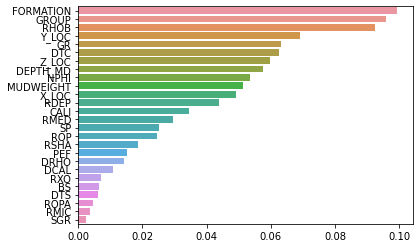

In [62]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

#### Test model

In [63]:
y_pred_test = model.predict(X_test)

In [64]:
score(y_test.values, y_pred_test)

-0.10756221771693193

##### Save model and scaler to files

In [65]:
pickle.dump(model, open('model.pkl', 'wb'))

In [66]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In order to make it easy to run inference on new data, such as the open test dataset, it is recommended to wrap the initialization of the model, all preprocessing steps including normalization, treatment of NaNs and removals of unused columns in a class or pipeline. There are many ways of doing this, one example being a class like below:

### K-Nearest Neighbors method

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [68]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### Test knn mdoel

In [69]:
y_pred_test_knn = knn_classifier.predict(X_test)

In [70]:
score(y_test.values, y_pred_test_knn)

-0.1595303381459802

### PCA

* Random forest

In [81]:
N_comp = 10

In [82]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=N_comp)
pca.fit(X_train)

PCA(n_components=10)

In [83]:
pca_2 = decomposition.PCA(n_components=N_comp)
pca_2.fit(X_test)

PCA(n_components=10)

In [84]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca_2.transform(X_test)

In [85]:
model_pca = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')
model_pca.fit(X_train_pca, y_train)
y_pred_test_pca = model_pca.predict(X_test_pca)

In [86]:
score(y_test.values, y_pred_test_pca)

-1.4120464230584862

* KNN

In [87]:
knn_classifier_pca = KNeighborsClassifier(n_neighbors=5)

In [88]:
knn_classifier_pca.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [89]:
y_pred_test_knn_pca = knn_classifier_pca.predict(X_test_pca)

In [90]:
score(y_test.values, y_pred_test_knn_pca)

-1.8304575459458985

In [ ]:
# class Model(object):
#     def __init__(self, model_file, scaler_file):
#         # Load pre-trained model from file
#         self.model = pickle.load(open(model_file, 'rb'))
#         # Load a "pre-trained" scaler from file
#         self.scaler = pickle.load(open(scaler_file, 'rb'))
        
#     def _preprocess(self, features):
#         # Method to be run before inference. Contains things like
#         # stripping unwanted columns, replacing NaNs, and scaling 
#         # or normalizing data
#         features.fillna(0, inplace=True)
#         features = features[['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION', 'CALI',
#        'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF', 'DTC', 'SP',
#        'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO']]
#         return self.scaler.transform(features)
        
#     def predict(self, features):
#         # This function should be able to take in features in their
#         # raw, unprocessed form as read from the file test.csv and
#         # return predictions as an array integers of the same length
#         X = self._preprocess(features)
#         return self.model.predict(X)

The model can then be initialized using persisted data in the form of saved model file (or models files), scaler files, and other persisted data.  

In [ ]:
# my_model = Model('model.pkl', 'scaler.pkl')

In [ ]:
!pip freeze > requirements.txt